# 7 deep learning
## 7-3 neural network training

In [2]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input,train_target),(test_input,test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input/255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled,train_target,test_size=0.2,random_state=42
)

In [9]:
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28)))
    model.add(keras.layers.Dense(100,activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10,activation='softmax'))
    return model

In [10]:
model = model_fn()

In [11]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               78500     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')

In [13]:
history = model.fit(train_scaled,train_target,epochs=5,verbose=0)

2022-07-11 17:31:30.284557: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-07-11 17:31:30.452270: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [14]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


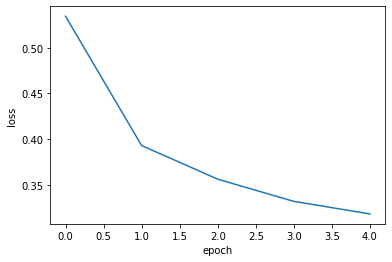

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

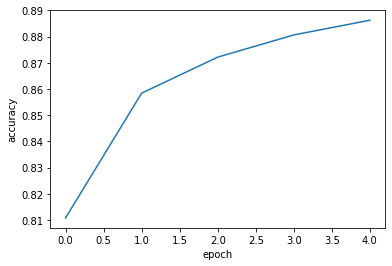

In [16]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

2022-07-11 17:35:33.147483: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


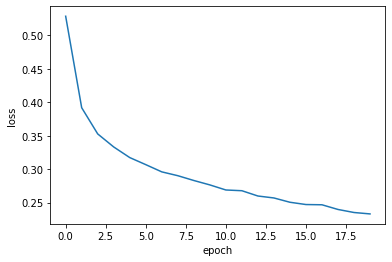

In [18]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')
history = model.fit(train_scaled,train_target,epochs=20,verbose=0)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [20]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')
history = model.fit(train_scaled,train_target,epochs=20,verbose=0,
                    validation_data=(val_scaled,val_target))

2022-07-11 17:59:11.607018: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-11 17:59:17.418990: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


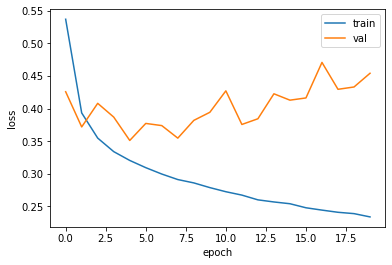

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

2022-07-11 18:20:55.497753: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-11 18:21:00.428252: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


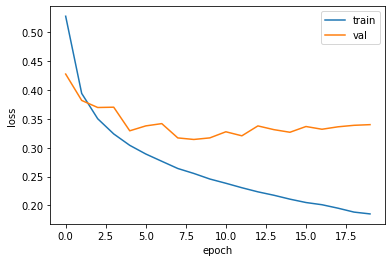

In [22]:
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')
history = model.fit(train_scaled,train_target,epochs=20,verbose=0,
                    validation_data=(val_scaled,val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [24]:
model=model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_13 (Dense)            (None, 100)               78500     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_14 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


2022-07-11 18:24:56.721623: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-11 18:25:01.964049: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


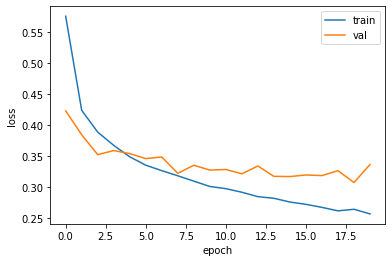

In [25]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')
history = model.fit(train_scaled,train_target,epochs=20,verbose=0,
                    validation_data=(val_scaled,val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [26]:
model=model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')
history = model.fit(train_scaled,train_target,epochs=10,verbose=0,
                    validation_data=(val_scaled,val_target))

2022-07-11 18:27:04.483365: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-11 18:27:09.945791: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [27]:
model.save_weights('model-weights.h5')
model.save('model-whole.h5')

In [28]:
!ls -al *.h5

-rw-r--r--  1 jack  staff  333448 Jul 11 18:28 model-weights.h5
-rw-r--r--  1 jack  staff  982664 Jul 11 18:28 model-whole.h5


In [30]:
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5')

In [31]:
import numpy as np
val_labels = np.argmax(model.predict(val_scaled),axis=-1)
print(np.mean(val_labels==val_target))

131/375 [=========>....................] - ETA: 0s

2022-07-11 18:33:22.064376: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


375/375 [==============================] - 0s 1ms/step
0.8765


In [32]:
model = keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled,val_target)

 45/375 [==>...........................] - ETA: 1s - loss: 0.3322 - accuracy: 0.8840

2022-07-11 18:36:02.322156: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


375/375 [==============================] - 1s 4ms/step - loss: 0.3296 - accuracy: 0.8765


[0.3296259045600891, 0.8765000104904175]

In [36]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')
model.fit(train_scaled,train_target,epochs=20,verbose=0,
          validation_data=(val_scaled,val_target),
          callbacks=[checkpoint_cb])

2022-07-11 20:40:46.505516: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-11 20:40:51.899276: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [37]:
model = keras.models.load_model('best-model.h5')
model.evaluate(val_scaled,val_target)

 41/375 [==>...........................] - ETA: 1s - loss: 0.3233 - accuracy: 0.8948

2022-07-11 20:42:51.181462: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


375/375 [==============================] - 1s 4ms/step - loss: 0.3262 - accuracy: 0.8852


[0.3262462615966797, 0.8852499723434448]

In [39]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                      restore_best_weights=True)
history=model.fit(train_scaled,train_target,epochs=20,verbose=0,
                  validation_data=(val_scaled,val_target),
                  callbacks=[checkpoint_cb,early_stopping_cb])

2022-07-11 20:44:54.052650: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-11 20:44:59.726974: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [40]:
print(early_stopping_cb.stopped_epoch)

10


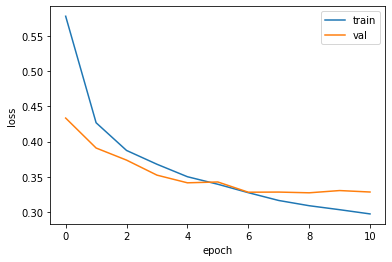

In [41]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [42]:
model.evaluate(val_scaled,val_target)

375/375 [==============================] - 1s 4ms/step - loss: 0.3274 - accuracy: 0.8821


[0.32735762000083923, 0.8820832967758179]